## 1. 工作原理

K最近邻，简称KNN(K Nearest Neighbors)，有监督机器学习模型，解决分类问题和回归问题。

KNN工作原理：
1. 给定一个新的要分类/预测的观测值。
2. 寻找K个具有相似特征的观测值，通常使用欧式距离度量观测值的“相似性”。
3. 对于分类问题，找出这些相似观测值中的多数类，标记为新观测值的类。
4. 对于回归问题，计算这些相似观测值的均值，视为新观测值的预测值。

#### 如何度量距离？

最常用的度量方式是欧氏距离，假设观测1$(x_1, x_2, x_3, \dots, x_n)$和观测2$(u_1, u_2, u_3, \dots, u_n)$，两者间的距离等于

$$d = \sqrt{(x_1 - u_1)^2 + (x_2 - u_2)^2 + \dots + (x_n - u_n)^2}$$

#### 官方案例

* [KNN分类](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py)
* [KNN回归](https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py)

## 2. sklearn实现

### 2.1 K近邻分类

sklearn提供两个接口实现最近邻分类:

* KNeighborsClassifier
* RadiusNeighborsClassifier

KNeighborsClassifier是最常用的模型，有两个重要的超参数：

1. 近邻数量K: 通常来说K越大越能有效消除噪音，但会使分类边界不明确。
2. 分配给近邻的权重weights。
    + 2.1: weights='uniform'给所有邻居分配统一权重。
    + 2.2: weights='distance'根据距离分配权重，越靠近查询点的邻居获得的权重越大。

关于权重分配

K近邻分类默认使用统一权重，分配给查询点的结果是根据最近邻居的简单多数投票计算得出的。在某些情况下，最好对邻居加权，以使较近的邻居对拟合的贡献更大。这可以通过调整weights参数实现。weights='uniform'给所有邻居分配统一权重，weights='distance'给每个邻居分配与查询点的距离的倒数成比例的权重，即越靠近查询点的邻居获得的权重越大。

使用IRIS数据集说明最近邻分类模型。

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

In [3]:
iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["target"] = iris.target

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


拆分训练集和检验集，拟合模型，查看不同K值对预测精度的影响。

neighbor(5): 0.967
neighbor(10): 0.933
neighbor(15): 0.967
neighbor(20): 0.933
neighbor(25): 0.933
neighbor(30): 0.900
neighbor(35): 0.900
neighbor(40): 0.867
neighbor(45): 0.867
neighbor(50): 0.867


Text(0.5, 1.0, 'Accuracy vs neighbors')

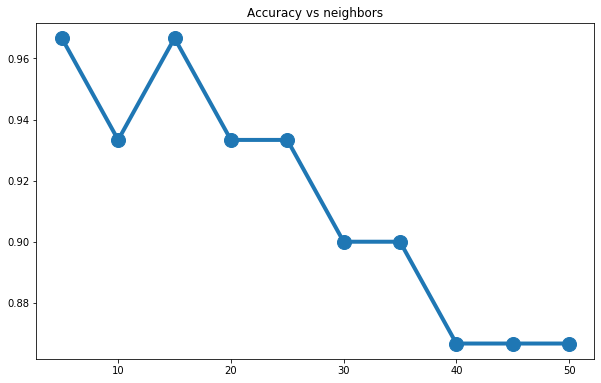

In [4]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

# 调整最近邻的数量，研究K值如何影响预测精度
neighbors = np.arange(5, 51, 5)

# 给所有邻居分配统一权重，用准确率评估分类性能
scores = []
for neighbor in neighbors:
    model = KNeighborsClassifier(n_neighbors=neighbor, weights="uniform")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(f"neighbor({neighbor}): {score:.3f}")
    scores.append(accuracy_score(y_pred, y_test))

fig, ax = plt.subplots(figsize=(10, 6.18))
ax.plot(neighbors, scores, "-o", markersize=14, linewidth=4)
ax.set_title("Accuracy vs neighbors")

查看不同的权重对预测精度的影响。

weight(uniform): 0.967
weight(distance): 0.967


Text(0.5, 1.0, 'Accuracy vs Weight')

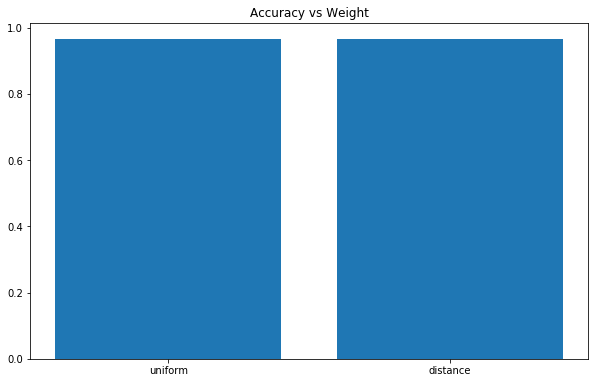

In [5]:
weights = ["uniform", "distance"]

scores = []
for weight in weights:
    model = KNeighborsClassifier(n_neighbors=15, weights=weight)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_pred, y_test)
    print(f"weight({weight}): {score:.3f}")
    scores.append(accuracy_score(y_pred, y_test))
    
fig, ax = plt.subplots(figsize=(10, 6.18))
ax.bar(x=weights, height=scores)
ax.set_title("Accuracy vs Weight")

### 2.2 K近邻回归

当目标变量是连续性数值变量而不是离散型变量时，可以使用KNN回归，分配给观测值的结果是最近邻居结果的平均值。

sklearn提供两个接口实现最近邻回归：

1. KNeighborsRegressor
2. RadiusNeighborsRegressor

KNeighborsRegressor是最常用的模型，有两个重要的超参数：

1. 近邻数量K: 用户自定义数量，最好使用网格搜索等方法寻找最优参数。
2. 分配给近邻的权重weights, 默认给所有近邻赋予统一的权重，但根据距离调整权重可能更有效。
    + 2.1 weights='uniform'，所有近邻使用统一权重，默认选项。
    + 2.2 weights='distance'，距离越近的邻居赋予更高的权重。

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

%matplotlib inline

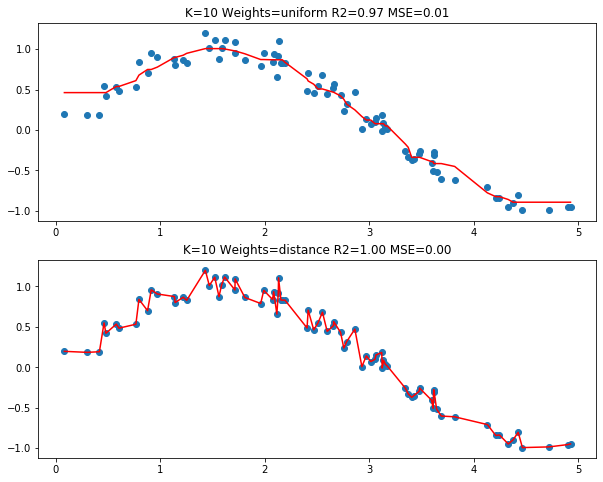

In [76]:
# 创建数据集，假设y=sin(x)+e, x服从均匀分布, e服从正态分布
np.random.seed(123)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, size=80)

# 选择超参数，观察不同参数组合如何影响预测精度
n_neighbors = 10
weights = ["uniform", "distance"]

# 拟合模型，用R2和MSE评估预测精度
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
for i,axi in enumerate(ax.flatten()):
    knn = KNeighborsRegressor(n_neighbors, weights[i])
    knn.fit(X, y)
    y_pred = knn.predict(X)
    r_2 = metrics.r2_score(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    axi.scatter(X.ravel(), y)
    axi.plot(X.ravel(), y_pred, color="red")
    axi.set_title(f"K={n_neighbors} Weights={weights[i]} R2={r_2:.2f} MSE={mse:.2f}")